In [1]:
import re
import string
import numpy as np

import json
import matplotlib.pyplot as plt
import scipy.signal
import scipy.integrate

import pandas as pd

In [2]:
def asl2numpy(filename, numcolumns=None):
    with open(filename, "rb") as file:
        headerbytes = None
        for line in file:
            if re.search(rb"column", line, re.I):
                break
            m = re.search(rb"([0-9]+) byte header", line)
            if m is not None:
                headerbytes = int(m.group(1))

        columns = []
        for line in file:
            column = line.strip()
            if len(column) != 0 and all(x in string.printable.encode() for x in column):
                columns.append(column)
            elif len(columns) != 0:
                break

        if numcolumns is not None:
            columns = columns[:numcolumns]
            columns = columns + [b"unknown %d" % i for i in range(numcolumns - len(columns))]

        file.seek(0)
        return np.frombuffer(file.read()[headerbytes:], dtype=">f4").astype("<f4").view([(x.decode(), "<f4") for x in columns])

In [3]:
pd.DataFrame(asl2numpy("../ASL Files/Princeton2020_1.avb"))

,r_trachea_in,r_left_in,r_right_in,r_trachea_out,r_left_out,r_right_out,c_left_v0,c_left_v1,c_left_v2,c_left_v3,...,galil_acceleration_limit,variable_parameters_file_path,labview1,labview2,labview3,labview4,labview5,c_left_nom,c_right_nom,Breath_File_Num
0,8.0,0.0,0.0,8.0,0.0,0.0,20.0,0.0,0.0,0.0,...,6000000.0,NaN,1.0,2.0,3.0,4.0,5.0,25.0,25.0,0.0
1,8.0,0.0,0.0,8.0,0.0,0.0,20.0,0.0,0.0,0.0,...,6000000.0,NaN,1.0,2.0,3.0,4.0,5.0,25.0,25.0,2.0
2,8.0,0.0,0.0,8.0,0.0,0.0,20.0,0.0,0.0,0.0,...,6000000.0,NaN,1.0,2.0,3.0,4.0,5.0,25.0,25.0,3.0
3,8.0,0.0,0.0,8.0,0.0,0.0,20.0,0.0,0.0,0.0,...,6000000.0,NaN,1.0,2.0,3.0,4.0,5.0,25.0,25.0,4.0
4,8.0,0.0,0.0,8.0,0.0,0.0,20.0,0.0,0.0,0.0,...,6000000.0,NaN,1.0,2.0,3.0,4.0,5.0,25.0,25.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,8.0,0.0,0.0,8.0,0.0,0.0,20.0,0.0,0.0,0.0,...,6000000.0,NaN,1.0,2.0,3.0,4.0,5.0,25.0,25.0,957.0
957,8.0,0.0,0.0,8.0,0.0,0.0,20.0,0.0,0.0,0.0,...,6000000.0,NaN,1.0,2.0,3.0,4.0,5.0,25.0,25.0,958.0
958,8.0,0.0,0.0,8.0,0.0,0.0,20.0,0.0,0.0,0.0,...,6000000.0,NaN,1.0,2.0,3.0,4.0,5.0,25.0,25.0,959.0
959,8.0,0.0,0.0,8.0,0.0,0.0,20.0,0.0,0.0,0.0,...,6000000.0,NaN,1.0,2.0,3.0,4.0,5.0,25.0,25.0,960.0


In [4]:
pd.DataFrame(asl2numpy("../ASL Files/Princeton2020_1.brb"))[["Insp Vt (mL)", "Exp Vt (mL)", "Vent Exp Vt (mL)", "Vent Insp Vt (mL)", "Vol 1 Peak (mL)", "Vol 2 Peak (mL)"]]

,Insp Vt (mL),Exp Vt (mL),Vent Exp Vt (mL),Vent Insp Vt (mL),Vol 1 Peak (mL),Vol 2 Peak (mL)
0,150.828735,90.231339,90.231339,150.828735,75.353897,75.353912
1,90.208977,90.402573,90.402573,90.208977,0.000000,0.000000
2,90.210442,90.404045,90.404045,90.210442,0.000000,0.000000
3,90.404045,92.092293,92.092293,90.404045,0.000000,0.000000
4,92.092293,92.108589,92.108589,92.092293,0.000000,0.000000
...,...,...,...,...,...,...
57031,0.012911,0.014620,0.014620,0.012911,0.000188,0.000406
57032,0.009785,0.004445,0.004445,0.009785,0.000000,0.000000
57033,0.004787,0.003419,0.003419,0.004787,0.000098,0.000098
57034,0.006008,0.000537,0.000537,0.006008,0.003610,0.003590


In [5]:
pd.DataFrame(asl2numpy("../ASL Files/Princeton2020_1.dtb", numcolumns = 16))[["Compressed Volume (mL)", "Total Volume (mL)", "Chamber 1 Volume (mL)", "Chamber 2 Volume (mL)"]]

,Compressed Volume (mL),Total Volume (mL),Chamber 1 Volume (mL),Chamber 2 Volume (mL)
0,6.566791,375.644165,187.760803,187.762939
1,6.562529,375.379242,187.636322,187.638184
2,6.557768,375.126190,187.511490,187.513290
3,6.553369,374.873474,187.386826,187.388565
4,6.549407,374.633667,187.263641,187.265503
...,...,...,...,...
1867555,0.458810,26.429543,13.211843,13.211945
1867556,0.459791,26.430525,13.212182,13.212289
1867557,0.459400,26.417717,13.211944,13.211837
1867558,0.456713,26.415031,13.210449,13.210347


In [6]:
pd.DataFrame(asl2numpy("../ASL Files/Princeton2020_1.rwb"))[["Time (sec)", "Chamber 1 Volume (L)", "Chamber 2 Volume (L)", "Total Volume (L)"]]

,Time (sec),Chamber 1 Volume (L),Chamber 2 Volume (L),Total Volume (L)
0,194.455078,0.184478,0.184478,0.369077
1,194.457031,0.184356,0.184356,0.368817
2,194.458984,0.184234,0.184234,0.368568
3,194.460938,0.184111,0.184111,0.368320
4,194.462891,0.183990,0.183990,0.368084
...,...,...,...,...
1867555,3842.023438,0.012982,0.012982,0.025971
1867556,3842.025391,0.012982,0.012982,0.025971
1867557,3842.027344,0.012982,0.012982,0.025958
1867558,3842.029297,0.012982,0.012982,0.025958


In [7]:
asleverything = asl2numpy("../ASL Files/Princeton2020_1.rwb")
asltime = asleverything["Time (sec)"]
aslvol1 = asleverything["Chamber 1 Volume (L)"]
aslvol2 = asleverything["Chamber 2 Volume (L)"]
aslvoltot = asleverything["Total Volume (L)"]

In [8]:
def read_our(filename):
    with open(filename) as file:
        time, pressure, flow = [], [], []
        for line in file:
            row = json.loads(line)
            time.append(row["t"] / 1000.0)
            pressure.append(0.0126 * row["P"] - 12.73)
            flow.append(0.7198 * np.sign(row["F"])*abs(row["F"])**(4/7))
        return np.array(time), np.array(pressure), np.array(flow)

In [9]:
ourtime, ourpressure, ourflow = read_our("../penn-2020-04-22/PrincetonFlowMeter_simtest.out")

In [10]:
rawvolume = scipy.integrate.cumtrapz(ourflow, ourtime / 60.0, initial=0)
ourvolume = scipy.signal.sosfilt(scipy.signal.butter(1, 0.004, "highpass", output="sos"), rawvolume)
ourvolume -= ourvolume[:10000].min()

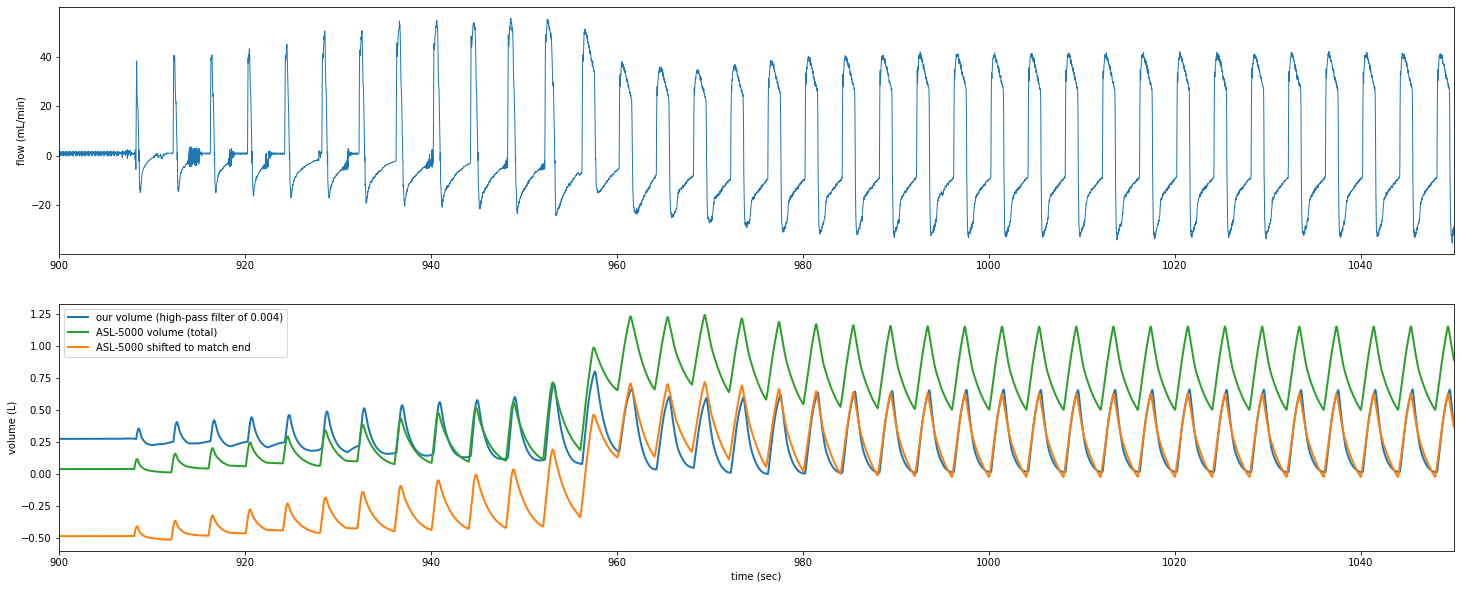

In [11]:
timeoffset = 867.6

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(25, 10))
ax1.plot(ourtime[:10000] - ourtime[0] + timeoffset, ourflow[:10000], linewidth=1)
ax1.set_xlim(900, 1050)
ax1.set_ylabel("flow (mL/min)")
ourvol, = ax2.plot(ourtime[:10000] - ourtime[0] + timeoffset, ourvolume[:10000], linewidth=2)
shifted, = ax2.plot(asltime[450000:550000] - asltime[0], aslvoltot[450000:550000] - 0.525, linewidth=2)
true, = ax2.plot(asltime[450000:550000] - asltime[0], aslvoltot[450000:550000], linewidth=2)
ax2.set_xlim(900, 1050)
ax2.set_ylabel("volume (L)")
ax2.set_xlabel("time (sec)")
ax2.legend([ourvol, true, shifted], ["our volume (high-pass filter of 0.004)", "ASL-5000 volume (total)", "ASL-5000 shifted to match end"])
fig.savefig("/tmp/volume-matching.png")

In [12]:
def diff_central(x, y):
    return np.gradient(y, x)

In [13]:
def read_nm3(filename):
    with open(filename) as file:
        for i, line in enumerate(file):
            if i == 8:
                break

        time, pressure, flow = [], [], []
        for line in file:
            row = line.strip().split()
            time.append(float(row[0]))
            pressure.append(float(row[2]))
            flow.append(float(row[3]))

        return np.array(time), np.array(pressure), np.array(flow)

In [14]:
nm3time, nm3pressure, nm3flow = read_nm3("../penn-2020-04-22/200422_princetonmonitor.txt")

In [15]:
nm3time_20 = nm3time.reshape(-1, 20).mean(axis=1)
nm3flow_20 = nm3flow.reshape(-1, 20).mean(axis=1)

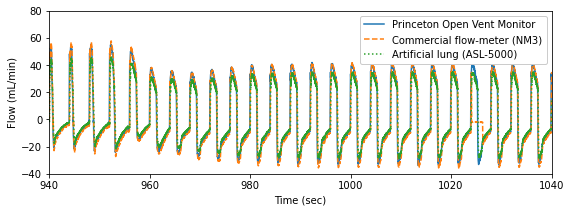

In [19]:
timeoffset = 867.3

fig, ax1 = plt.subplots(1, 1, figsize=(9, 3))
ours, = ax1.plot(ourtime[:10000] - ourtime[0] + timeoffset, ourflow[:10000], linewidth=1.5)
nm3, = ax1.plot(nm3time_20[:10000] - nm3time[0] + timeoffset + 28.99, nm3flow_20[:10000], linestyle="--", linewidth=1.5)
truth, = ax1.plot(asltime[450000:550000] - asltime[0], diff_central((asltime[450000:550000] - asltime[0])/60, aslvoltot[450000:550000]), linestyle=":", linewidth=1.5)
ax1.set_xlim(940, 1040)
ax1.set_ylim(-40, 80)
ax1.legend([ours, nm3, truth], ["Princeton Open Vent Monitor", "Commercial flow-meter (NM3)", "Artificial lung (ASL-5000)"], loc="upper right", framealpha=1)
ax1.set_ylabel("Flow (mL/min)")
ax1.set_xlabel("Time (sec)")
fig.savefig("povm-nm3-asl.svg")

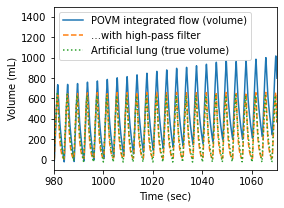

In [63]:
timeoffset = 867.6

fig, ax2 = plt.subplots(1, 1, figsize=(4, 3))
rawvol, = ax2.plot(ourtime[:20000] - ourtime[0] + timeoffset, (rawvolume[:20000] - 1.36)*1000, linewidth=1.5)
ourvol, = ax2.plot(ourtime[:20000] - ourtime[0] + timeoffset, ourvolume[:20000]*1000, linestyle="--", linewidth=1.5)
shifted, = ax2.plot(asltime[450000:650000] - asltime[0], (aslvoltot[450000:650000] - 0.525)*1000, linestyle=":", linewidth=1.5)
ax2.set_xlim(980, 1070)
ax2.set_ylim(-100, 1500)
ax2.legend([rawvol, ourvol, shifted], ["POVM integrated flow (volume)", "…with high-pass filter", "Artificial lung (true volume)"])
ax2.set_ylabel("Volume (mL)")
ax2.set_xlabel("Time (sec)")
fig.savefig("asl-volume-drift.svg")

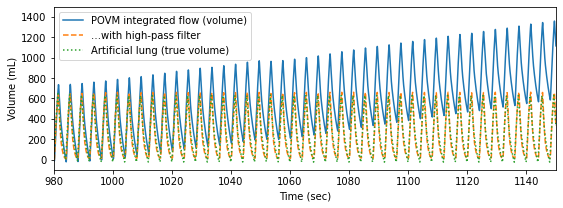

In [64]:
timeoffset = 867.6

fig, ax2 = plt.subplots(1, 1, figsize=(9, 3))
rawvol, = ax2.plot(ourtime[:20000] - ourtime[0] + timeoffset, (rawvolume[:20000] - 1.36)*1000, linewidth=1.5)
ourvol, = ax2.plot(ourtime[:20000] - ourtime[0] + timeoffset, ourvolume[:20000]*1000, linestyle="--", linewidth=1.5)
shifted, = ax2.plot(asltime[450000:650000] - asltime[0], (aslvoltot[450000:650000] - 0.525)*1000, linestyle=":", linewidth=1.5)
ax2.set_xlim(980, 1150)
ax2.set_ylim(-100, 1500)
ax2.legend([rawvol, ourvol, shifted], ["POVM integrated flow (volume)", "…with high-pass filter", "Artificial lung (true volume)"])
ax2.set_ylabel("Volume (mL)")
ax2.set_xlabel("Time (sec)")
fig.savefig("asl-volume-drift-big.svg")